<a href="https://colab.research.google.com/github/Gracia123/Sales-Prediction/blob/main/CS680_A6_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generalities for DAEs and VAEs

* Import libraries
* Run on GPU if possible
* Create data loaders

In [ ]:
from __future__ import print_function
import argparse
import torch
import torch.utils.data
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image
from IPython.display import Image, display
import matplotlib.pyplot as plt

# create directory to save results
!mkdir results

# script parameters
batch_size = 128
log_interval = 100

# run on GPU if possible
cuda = torch.cuda.is_available()
device = torch.device("cuda" if cuda else "cpu")

# create data loaders
kwargs = {'num_workers': 1, 'pin_memory': True} if cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True, **kwargs)

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw
Processing...
Done!





/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


# Neural Network classes

* Deterministic auto-encoder (DAE)
* Variational auto-encoder (VAE)


In [ ]:
# Deterministic Auto-Encoder (DAE)
class DAE(nn.Module):

    # declare layers
    def __init__(self):
        super(DAE, self).__init__()
        self.fc1 = nn.Linear(784, 400)
        self.fc2 = nn.Linear(400, 20)
        self.fc3 = nn.Linear(20, 400)
        self.fc4 = nn.Linear(400, 784)

    # encoder: one ReLU hidden layer of 400 nodes, one Linear output layer of 20 nodes
    def encode(self, x):
        h = F.relu(self.fc1(x))
        return self.fc2(h)

    # decoder: one ReLU hidden layer of 400 nodes, one sigmoid output layer of 784 nodes
    def decode(self, z):
        h3 = F.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h3))

    # forward: encoder followed by decoder
    def forward(self, x):
        z = self.encode(x.view(-1, 784))
        return self.decode(z)

# Variational Auto-Encoder (VAE)     
class VAE(nn.Module):

    # declare layers
    def __init__(self):
        super(VAE, self).__init__()

        # dummy assignment until this function is filled in
        self.fc1 = nn.Linear(784, 400)
        self.fc2_mean = nn.Linear(400, 20)
        self.fc2_var = nn.Linear(400, 20)
        self.fc3 = nn.Linear(20, 400)
        self.fc4 = nn.Linear(400, 784)

    # Encoder: one ReLU hidden layer of 400 nodes, two Linear output layers of 20 nodes (means and log_variances)
    # Input: image (array of size 784)
    # Output: means (array of size 20), log_variances (array of size 20)
    def encode(self, x):

        # dummy assignment until this function is filled in
        h = F.relu(self.fc1(x))
        #means = torch.randn(x.shape[0], 20).to(device)
        means = self.fc2_mean(h)
        #log_variances = torch.randn(x.shape[0], 20).to(device)
        log_variances = self.fc2_var(h)
        return means, log_variances

    # Reparameterization:
    #
    # Let eps be samples from a Normal(0,1)
    # Input: means (array of size 20), log_variances (array of size 20)
    # Output: embedding (array of size 20 corresponding to means + eps * exponential(log_variances/2))
    def reparameterize(self, means, log_variances):

        # dummy assignment until this function is filled in
        std = log_variances.mul(0.5).exp_()
        eps = torch.empty_like(std).normal_()
        embedding = torch.randn(means.shape[0], 20).to(device)
        embedding = eps.mul(std).add_(means)
        return embedding

    # Decoder: one ReLU hidden layer of 400 nodes, one sigmoid output layer of 784 nodes
    # Input: embedding (array of size 20)
    # Output: probability of reconstructed image (array of size 784)
    def decode(self, z):
        
        # dummy assignment until this function is filled in
        h3 = F.relu(self.fc3(z))
        # dummy assignment until this function is filled in
        probabilities = torch.rand(z.shape[0],784).to(device)
        probabilities = torch.sigmoid(self.fc4(h3))
        return probabilities

    # Function forward: encoder, reparameterize, decoder
    # Input: image
    # Output: probability of reconstructed image, means, log_variances
    def forward(self, x):

        # dummy assignment until this function is filled in
        #z = self.reparameterize(means,log_variances)
        probabilities = torch.rand(x.shape[0],20).to(device)
        means = torch.randn(x.shape[0], 20).to(device)
        log_variances = torch.randn(x.shape[0], 20).to(device)
        means, log_variances = self.encode(x.view(-1, 784))
        z = self.reparameterize(means,log_variances)
        probabilities = self.decode(z)
        return probabilities, means, log_variances

# Loss Functions

In [ ]:
# DAE Loss Function
# Reconstruction loss: binary cross entropy
#
# Inputs:
#    reconstructed_x: reconstructed image
#    x: image
#
# Output:
#    BCE: binary cross entropy  
#
def dae_loss_function(reconstructed_x, x):
    BCE = F.binary_cross_entropy(reconstructed_x, x.view(-1, 784), reduction='sum')
    return BCE

# VAE Loss Function
# Reconstruction loss: binary cross entropy
# KL divergence loss: -0.5 * sum(1 + log_variances - means^2 - exp(log_variances))
#       see Appendix B from VAE paper:
#       Kingma and Welling. Auto-Encoding Variational Bayes. ICLR, 2014
#       https://arxiv.org/abs/1312.6114
#
# Inputs: 
#    reconstructed_x: reconstructed image
#    x: image
#    means: array of size 20
#    log_variances: array of size 20
#
# Outputs:
#    total_loss: binary cross entropy + KL divergence (scalar)
#    BCE: binary cross entropy (scalar)
#
def vae_loss_function(reconstructed_x, x, means, log_variances):

    # dummy assignment until this function is filled in
    total_loss = 0
    BCE = 0
    BCE = F.binary_cross_entropy(reconstructed_x, x.view(-1, 784), reduction='sum')
    KL_div = -0.5 * torch.sum(1 + log_variances - means.pow(2) - log_variances.exp())
    total_loss = BCE + KL_div
    return total_loss, BCE

# Training

In [ ]:
# DAE Training
#
# Inputs:
#    epoch: epoch #
#    model: DAE neural network
#    optimizer: DAE optimizer
#
# Outputs:
#    average_train_BCE: binary cross entropy (scalar)
#
def dae_train(epoch, model, optimizer):
    train_BCE = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        recon_batch = model(data)
        loss = dae_loss_function(recon_batch, data)
        loss.backward()
        train_BCE += loss.item()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader),
                loss.item() / len(data)))

    average_train_BCE = train_BCE / len(train_loader.dataset)
    print('====> Epoch: {} Average loss: {:.4f}'.format(
          epoch, average_train_BCE))
    return average_train_BCE

# VAE Training
#
# Inputs:
#    epoch: epoch #
#    model: VAE neural network
#    optimizer: VAE optimizer
#
# Outputs:
#    average_train_loss: binary cross entropy + KL divergence (scalar)
#    average_train_BCE: binary cross entropy (scalar)
#
def vae_train(epoch, model, optimizer):
    train_BCE = 0
    train_total = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        recon_batch, means, log_variances = model(data)
        total_loss, loss_1 = vae_loss_function(recon_batch, data, means, log_variances)
        #loss_1.backward(retain_graph=True)
        total_loss.backward()
        train_BCE += loss_1.item()
        train_total += total_loss.item()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader),
                loss_1.item() / len(data),
                total_loss.item() / len(data)))  

    average_train_BCE = train_BCE / len(train_loader.dataset)
    average_train_loss = train_total / len(train_loader.dataset)
    print('====> Epoch: {} Average loss: {:.4f}'.format(
          epoch, average_train_BCE, average_train_loss))          
    return average_train_loss, average_train_BCE

# Testing

In [ ]:
# DAE Test
#
# Inputs:
#    epoch: epoch #
#    model: DAE neural network
#
# Outputs:
#    average_test_BCE: binary cross entropy (scalar)
#
def dae_test(epoch, model):
    model.eval()
    test_BCE = 0
    with torch.no_grad():
        for i, (data, _) in enumerate(test_loader):
            data = data.to(device)
            recon_batch = model(data)
            test_BCE += dae_loss_function(recon_batch, data).item()
            if i == 0:
                n = min(data.size(0), 8)
                comparison = torch.cat([data[:n],
                                      recon_batch.view(batch_size, 1, 28, 28)[:n]])
                save_image(comparison.cpu(),
                         'results/reconstruction_' + str(epoch) + '.png', nrow=n)
                print('Sample of reconstructed images (top row are targets and bottom row are reconstructions)')
                display(Image('results/reconstruction_' + str(epoch) + '.png'))

    average_test_BCE = test_BCE / len(test_loader.dataset)
    print('====> Test set loss: {:.4f}'.format(average_test_BCE))
    return average_test_BCE

# VAE Test
#
# Inputs:
#    epoch: epoch #
#    model: VAE neural network
#
# Outputs:
#    average_test_loss: binary cross entropy + KL divergence (scalar)
#    average_test_BCE: binary cross entropy (scalar)
#
def vae_test(epoch, model):
    model.eval()
    test_BCE = 0
    test_loss = 0
    with torch.no_grad():
        for i, (data, _) in enumerate(test_loader):
            data = data.to(device)
            recon_batch, means, log_variances = model(data)
            loss, BCE = vae_loss_function(recon_batch, data, means, log_variances)
            #test_loss, test_BCE += vae_loss_function(recon_batch, data, means, log_variances)
            test_BCE += BCE
            test_loss += loss
            if i == 0:
                n = min(data.size(0), 8)
                comparison = torch.cat([data[:n],
                                      recon_batch.view(batch_size, 1, 28, 28)[:n]])
                save_image(comparison.cpu(),
                         'results/reconstruction_' + str(epoch) + '.png', nrow=n)
                print('Sample of reconstructed images (top row are targets and bottom row are reconstructions)')
                display(Image('results/reconstruction_' + str(epoch) + '.png'))
    average_test_loss = test_loss / len(test_loader.dataset)
    average_test_BCE = test_BCE / len(test_loader.dataset)
    print('====> Test set loss: {:.4f}'.format(average_test_BCE, average_test_BCE))
    return average_test_loss, average_test_BCE



# Main

Train Epoch: 1 [0/60000 (0%)]	Loss: 543.103149
Train Epoch: 1 [12800/60000 (21%)]	Loss: 144.565979
Train Epoch: 1 [25600/60000 (43%)]	Loss: 112.174759
Train Epoch: 1 [38400/60000 (64%)]	Loss: 106.397942
Train Epoch: 1 [51200/60000 (85%)]	Loss: 93.266701
====> Epoch: 1 Average loss: 129.5709
Sample of reconstructed images (top row are targets and bottom row are reconstructions)


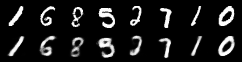

====> Test set loss: 88.0491
Sample of generated images


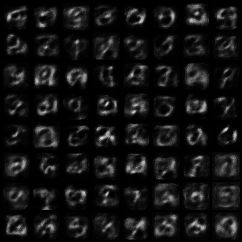



Train Epoch: 2 [0/60000 (0%)]	Loss: 93.416336
Train Epoch: 2 [12800/60000 (21%)]	Loss: 82.988068
Train Epoch: 2 [25600/60000 (43%)]	Loss: 80.814842
Train Epoch: 2 [38400/60000 (64%)]	Loss: 84.731277
Train Epoch: 2 [51200/60000 (85%)]	Loss: 77.682236
====> Epoch: 2 Average loss: 82.7194
Sample of reconstructed images (top row are targets and bottom row are reconstructions)


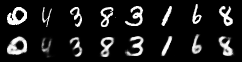

====> Test set loss: 77.8182
Sample of generated images


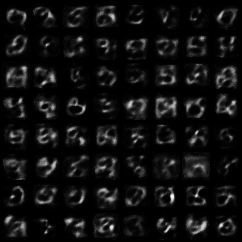



Train Epoch: 3 [0/60000 (0%)]	Loss: 74.271156
Train Epoch: 3 [12800/60000 (21%)]	Loss: 76.568451
Train Epoch: 3 [25600/60000 (43%)]	Loss: 79.062035
Train Epoch: 3 [38400/60000 (64%)]	Loss: 77.458664
Train Epoch: 3 [51200/60000 (85%)]	Loss: 75.889534
====> Epoch: 3 Average loss: 76.7806
Sample of reconstructed images (top row are targets and bottom row are reconstructions)


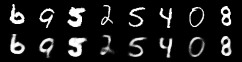

====> Test set loss: 74.3027
Sample of generated images


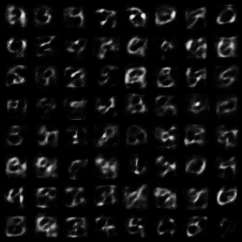



Train Epoch: 4 [0/60000 (0%)]	Loss: 73.069290
Train Epoch: 4 [12800/60000 (21%)]	Loss: 78.703407
Train Epoch: 4 [25600/60000 (43%)]	Loss: 76.509506
Train Epoch: 4 [38400/60000 (64%)]	Loss: 75.046089
Train Epoch: 4 [51200/60000 (85%)]	Loss: 73.465622
====> Epoch: 4 Average loss: 73.9717
Sample of reconstructed images (top row are targets and bottom row are reconstructions)


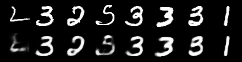

====> Test set loss: 72.4850
Sample of generated images


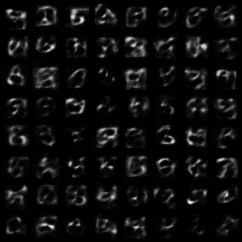



Train Epoch: 5 [0/60000 (0%)]	Loss: 72.926514
Train Epoch: 5 [12800/60000 (21%)]	Loss: 68.792061
Train Epoch: 5 [25600/60000 (43%)]	Loss: 73.348427
Train Epoch: 5 [38400/60000 (64%)]	Loss: 71.082733
Train Epoch: 5 [51200/60000 (85%)]	Loss: 73.205811
====> Epoch: 5 Average loss: 72.2158
Sample of reconstructed images (top row are targets and bottom row are reconstructions)


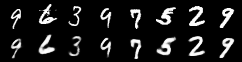

====> Test set loss: 71.1561
Sample of generated images


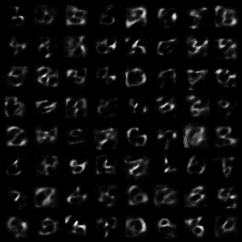



Train Epoch: 6 [0/60000 (0%)]	Loss: 74.738136
Train Epoch: 6 [12800/60000 (21%)]	Loss: 71.525085
Train Epoch: 6 [25600/60000 (43%)]	Loss: 74.135635
Train Epoch: 6 [38400/60000 (64%)]	Loss: 70.237442
Train Epoch: 6 [51200/60000 (85%)]	Loss: 67.792236
====> Epoch: 6 Average loss: 70.9257
Sample of reconstructed images (top row are targets and bottom row are reconstructions)


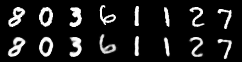

====> Test set loss: 70.0679
Sample of generated images


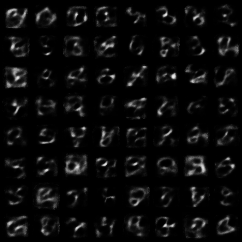



Train Epoch: 7 [0/60000 (0%)]	Loss: 69.401222
Train Epoch: 7 [12800/60000 (21%)]	Loss: 70.864792
Train Epoch: 7 [25600/60000 (43%)]	Loss: 68.841034
Train Epoch: 7 [38400/60000 (64%)]	Loss: 70.833649
Train Epoch: 7 [51200/60000 (85%)]	Loss: 70.571693
====> Epoch: 7 Average loss: 69.9569
Sample of reconstructed images (top row are targets and bottom row are reconstructions)


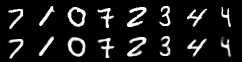

====> Test set loss: 69.3383
Sample of generated images


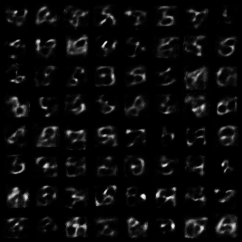



Train Epoch: 8 [0/60000 (0%)]	Loss: 68.690651
Train Epoch: 8 [12800/60000 (21%)]	Loss: 67.194313
Train Epoch: 8 [25600/60000 (43%)]	Loss: 68.697266
Train Epoch: 8 [38400/60000 (64%)]	Loss: 71.578041
Train Epoch: 8 [51200/60000 (85%)]	Loss: 67.940239
====> Epoch: 8 Average loss: 69.1888
Sample of reconstructed images (top row are targets and bottom row are reconstructions)


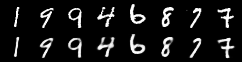

====> Test set loss: 68.7730
Sample of generated images


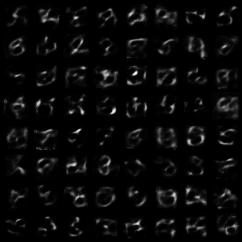



Train Epoch: 9 [0/60000 (0%)]	Loss: 67.475014
Train Epoch: 9 [12800/60000 (21%)]	Loss: 66.872086
Train Epoch: 9 [25600/60000 (43%)]	Loss: 71.813377
Train Epoch: 9 [38400/60000 (64%)]	Loss: 67.889824
Train Epoch: 9 [51200/60000 (85%)]	Loss: 66.939972
====> Epoch: 9 Average loss: 68.5900
Sample of reconstructed images (top row are targets and bottom row are reconstructions)


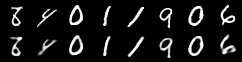

====> Test set loss: 68.1630
Sample of generated images


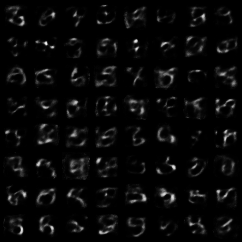



Train Epoch: 10 [0/60000 (0%)]	Loss: 66.400993
Train Epoch: 10 [12800/60000 (21%)]	Loss: 71.294724
Train Epoch: 10 [25600/60000 (43%)]	Loss: 66.593315
Train Epoch: 10 [38400/60000 (64%)]	Loss: 67.638855
Train Epoch: 10 [51200/60000 (85%)]	Loss: 65.504997
====> Epoch: 10 Average loss: 68.0682
Sample of reconstructed images (top row are targets and bottom row are reconstructions)


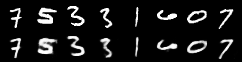

====> Test set loss: 67.7834
Sample of generated images


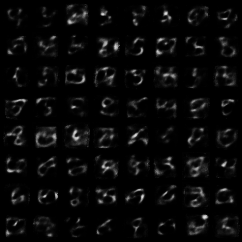



Train Epoch: 1 [0/60000 (0%)]	Loss: 549.921509
Train Epoch: 1 [12800/60000 (21%)]	Loss: 174.687180
Train Epoch: 1 [25600/60000 (43%)]	Loss: 139.518387
Train Epoch: 1 [38400/60000 (64%)]	Loss: 120.704430
Train Epoch: 1 [51200/60000 (85%)]	Loss: 113.149109
====> Epoch: 1 Average loss: 149.7505
Sample of reconstructed images (top row are targets and bottom row are reconstructions)


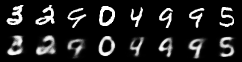

====> Test set loss: 107.1899
Sample of generated images


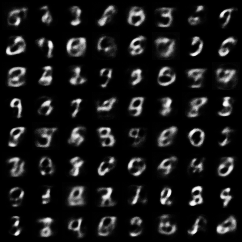



Train Epoch: 2 [0/60000 (0%)]	Loss: 109.164841
Train Epoch: 2 [12800/60000 (21%)]	Loss: 107.565796
Train Epoch: 2 [25600/60000 (43%)]	Loss: 94.719681
Train Epoch: 2 [38400/60000 (64%)]	Loss: 96.088501
Train Epoch: 2 [51200/60000 (85%)]	Loss: 96.172562
====> Epoch: 2 Average loss: 99.6614
Sample of reconstructed images (top row are targets and bottom row are reconstructions)


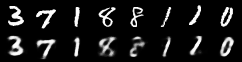

====> Test set loss: 92.8847
Sample of generated images


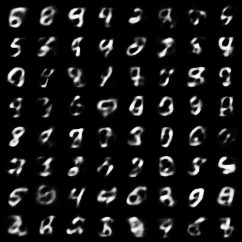



Train Epoch: 3 [0/60000 (0%)]	Loss: 89.138321
Train Epoch: 3 [12800/60000 (21%)]	Loss: 92.969971
Train Epoch: 3 [25600/60000 (43%)]	Loss: 85.468460
Train Epoch: 3 [38400/60000 (64%)]	Loss: 90.101059
Train Epoch: 3 [51200/60000 (85%)]	Loss: 89.897972
====> Epoch: 3 Average loss: 90.8573
Sample of reconstructed images (top row are targets and bottom row are reconstructions)


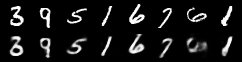

====> Test set loss: 87.7106
Sample of generated images


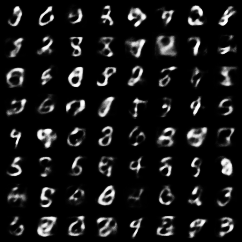



Train Epoch: 4 [0/60000 (0%)]	Loss: 92.082840
Train Epoch: 4 [12800/60000 (21%)]	Loss: 84.463715
Train Epoch: 4 [25600/60000 (43%)]	Loss: 88.833260
Train Epoch: 4 [38400/60000 (64%)]	Loss: 87.280182
Train Epoch: 4 [51200/60000 (85%)]	Loss: 86.098694
====> Epoch: 4 Average loss: 87.2706
Sample of reconstructed images (top row are targets and bottom row are reconstructions)


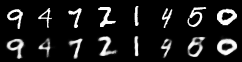

====> Test set loss: 85.2812
Sample of generated images


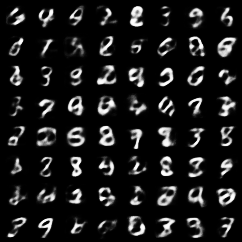



Train Epoch: 5 [0/60000 (0%)]	Loss: 85.260101
Train Epoch: 5 [12800/60000 (21%)]	Loss: 82.229599
Train Epoch: 5 [25600/60000 (43%)]	Loss: 84.750267
Train Epoch: 5 [38400/60000 (64%)]	Loss: 84.330750
Train Epoch: 5 [51200/60000 (85%)]	Loss: 85.635468
====> Epoch: 5 Average loss: 85.2559
Sample of reconstructed images (top row are targets and bottom row are reconstructions)


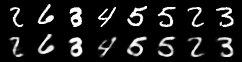

====> Test set loss: 83.5505
Sample of generated images


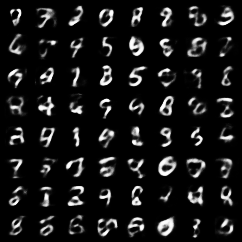



Train Epoch: 6 [0/60000 (0%)]	Loss: 83.423279
Train Epoch: 6 [12800/60000 (21%)]	Loss: 84.336197
Train Epoch: 6 [25600/60000 (43%)]	Loss: 83.867249
Train Epoch: 6 [38400/60000 (64%)]	Loss: 84.267891
Train Epoch: 6 [51200/60000 (85%)]	Loss: 84.668175
====> Epoch: 6 Average loss: 83.8959
Sample of reconstructed images (top row are targets and bottom row are reconstructions)


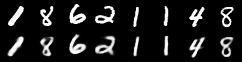

====> Test set loss: 82.4056
Sample of generated images


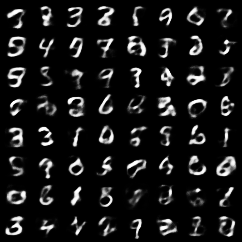



Train Epoch: 7 [0/60000 (0%)]	Loss: 80.202866
Train Epoch: 7 [12800/60000 (21%)]	Loss: 83.727859
Train Epoch: 7 [25600/60000 (43%)]	Loss: 83.336761
Train Epoch: 7 [38400/60000 (64%)]	Loss: 83.434067
Train Epoch: 7 [51200/60000 (85%)]	Loss: 81.294113
====> Epoch: 7 Average loss: 82.9431
Sample of reconstructed images (top row are targets and bottom row are reconstructions)


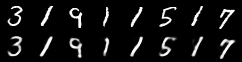

====> Test set loss: 82.4655
Sample of generated images


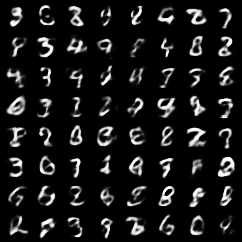



Train Epoch: 8 [0/60000 (0%)]	Loss: 84.383347
Train Epoch: 8 [12800/60000 (21%)]	Loss: 84.752762
Train Epoch: 8 [25600/60000 (43%)]	Loss: 81.100471
Train Epoch: 8 [38400/60000 (64%)]	Loss: 84.377190
Train Epoch: 8 [51200/60000 (85%)]	Loss: 80.859993
====> Epoch: 8 Average loss: 82.1918
Sample of reconstructed images (top row are targets and bottom row are reconstructions)


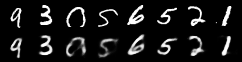

====> Test set loss: 81.5082
Sample of generated images


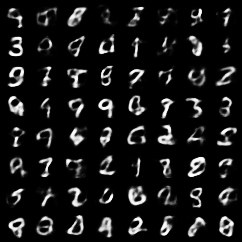



Train Epoch: 9 [0/60000 (0%)]	Loss: 82.689392
Train Epoch: 9 [12800/60000 (21%)]	Loss: 86.028259
Train Epoch: 9 [25600/60000 (43%)]	Loss: 79.016022
Train Epoch: 9 [38400/60000 (64%)]	Loss: 80.322739
Train Epoch: 9 [51200/60000 (85%)]	Loss: 81.315987
====> Epoch: 9 Average loss: 81.6105
Sample of reconstructed images (top row are targets and bottom row are reconstructions)


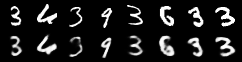

====> Test set loss: 80.6173
Sample of generated images


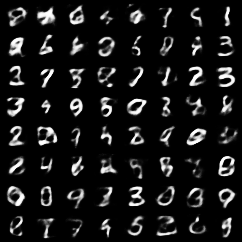



Train Epoch: 10 [0/60000 (0%)]	Loss: 76.173096
Train Epoch: 10 [12800/60000 (21%)]	Loss: 79.472290
Train Epoch: 10 [25600/60000 (43%)]	Loss: 80.920898
Train Epoch: 10 [38400/60000 (64%)]	Loss: 81.629417
Train Epoch: 10 [51200/60000 (85%)]	Loss: 78.964996
====> Epoch: 10 Average loss: 81.1593
Sample of reconstructed images (top row are targets and bottom row are reconstructions)


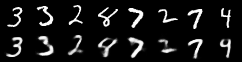

====> Test set loss: 80.9608
Sample of generated images


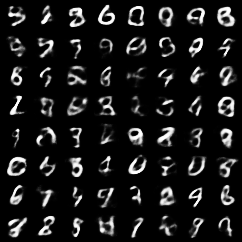

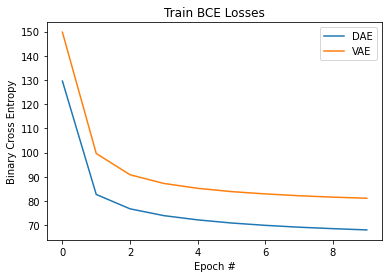

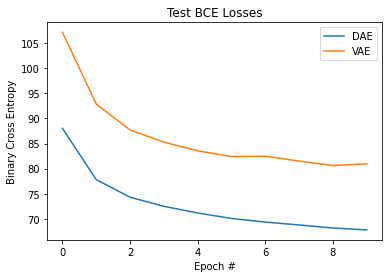

In [ ]:
# train and test DAE
epochs = 10
dae_average_train_BCE = []
dae_average_test_BCE = []
dae_model = DAE().to(device)
dae_optimizer = optim.Adam(dae_model.parameters(), lr=1e-3)
for epoch in range(1, epochs + 1):
    average_train_BCE = dae_train(epoch, dae_model, dae_optimizer)
    dae_average_train_BCE.append(average_train_BCE)
    average_test_BCE = dae_test(epoch, dae_model)
    dae_average_test_BCE.append(average_test_BCE)
    with torch.no_grad():
        sample = torch.randn(64, 20).to(device)
        sample = dae_model.decode(sample).cpu()
        save_image(sample.view(64, 1, 28, 28),
                   'results/sample_' + str(epoch) + '.png')
        print('Sample of generated images')
        display(Image('results/sample_' + str(epoch) + '.png'))
        print('\n')

# train and test VAE
epochs = 10
vae_average_train_losses = []
vae_average_train_BCE = []
vae_average_test_losses = []
vae_average_test_BCE = []
vae_model = VAE().to(device)
vae_optimizer = optim.Adam(vae_model.parameters(), lr=1e-3)
for epoch in range(1, epochs + 1):
    average_train_loss, average_train_BCE = vae_train(epoch, vae_model, vae_optimizer)
    vae_average_train_losses.append(average_train_loss)
    vae_average_train_BCE.append(average_train_BCE)
    average_test_loss, average_test_BCE = vae_test(epoch, vae_model)
    vae_average_test_losses.append(average_test_loss)
    vae_average_test_BCE.append(average_test_BCE)
    with torch.no_grad():
        sample = torch.randn(64, 20).to(device)
        sample = vae_model.decode(sample).cpu()
        save_image(sample.view(64, 1, 28, 28),
                   'results/sample_' + str(epoch) + '.png')
        print('Sample of generated images')
        display(Image('results/sample_' + str(epoch) + '.png'))
        print('\n')

# Plot Train BCE Losses
plt.plot(dae_average_train_BCE)
plt.plot(vae_average_train_BCE)
plt.title('Train BCE Losses')
plt.ylabel('Binary Cross Entropy')
plt.xlabel('Epoch #')
plt.legend(['DAE','VAE'], loc='upper right')
plt.show()

# Plot Test BCE Losses
plt.plot(dae_average_test_BCE)
plt.plot(vae_average_test_BCE)
plt.title('Test BCE Losses')
plt.ylabel('Binary Cross Entropy')
plt.xlabel('Epoch #')
plt.legend(['DAE','VAE'], loc='upper right')
plt.show()